In [ ]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = '/content/drive/MyDrive/PreOnboardingEDA-Retailstoredata.csv'
df = pd.read_csv(path, encoding='latin1')

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
df.shape

(9994, 21)

# Descriptive Statistics

In [ ]:
df[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


Value Counts of Categorical Variables

In [ ]:
category_counts = df['Category'].value_counts().to_frame()
category_counts = category_counts.rename(columns={"Category":"Frequency"})
category_counts

,Frequency
Office Supplies,6026
Furniture,2121
Technology,1847


In [ ]:
shipmode_counts = df['Ship Mode'].value_counts().to_frame()
shipmode_counts = shipmode_counts.rename(columns={"Ship Mode":"Frequency"})
shipmode_counts

,Frequency
Standard Class,5968
Second Class,1945
First Class,1538
Same Day,543


In [ ]:
segment_counts = df['Segment'].value_counts().to_frame()
segment_counts = segment_counts.rename(columns={"Segment":"Frequency"})
segment_counts

,Frequency
Consumer,5191
Corporate,3020
Home Office,1783


In [ ]:
region_counts = df['Region'].value_counts().to_frame()
region_counts = region_counts.rename(columns={"Region":"Frequency"})
region_counts

,Frequency
West,3203
East,2848
Central,2323
South,1620


In [ ]:
state_counts = df['State'].value_counts().to_frame()
state_counts = state_counts.rename(columns={"State":"Frequency"})
state_counts

Box Plots

KeyboardInterrupt: ignored

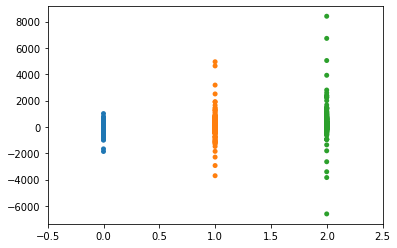

In [ ]:
sns.swarmplot(x='Category', y='Profit', data=df)

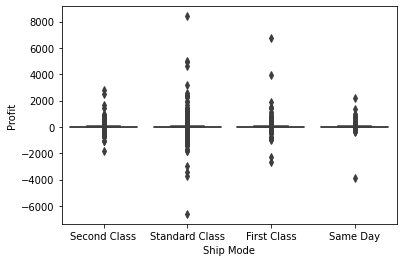

In [ ]:
sns.boxplot(x="Ship Mode", y="Profit", data=df)

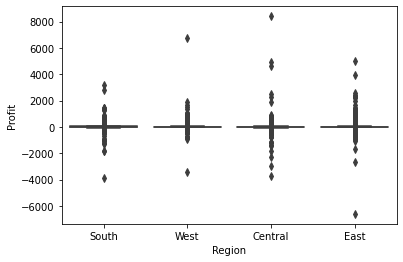

In [ ]:
sns.boxplot(x="Region", y="Profit", data=df)

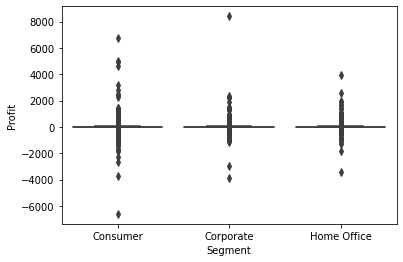

In [ ]:
sns.boxplot(x="Segment", y="Profit", data=df)

Bar Plots

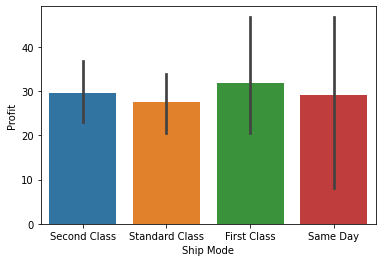

In [ ]:
sns.barplot(x="Ship Mode", y="Profit", data=df)

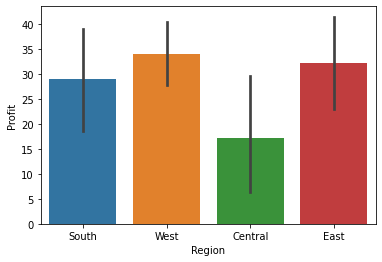

In [ ]:
sns.barplot(x="Region", y="Profit", data=df)

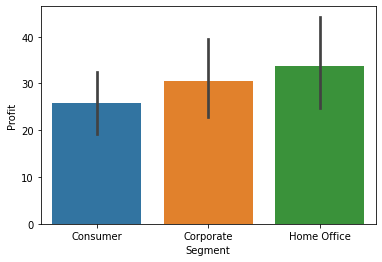

In [ ]:
sns.barplot(x="Segment", y="Profit", data=df)

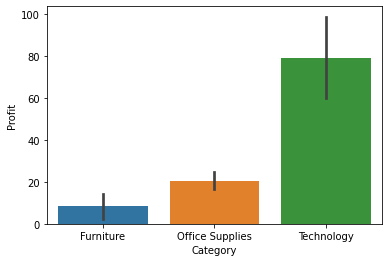

In [ ]:
sns.barplot(x="Category", y="Profit", data=df)

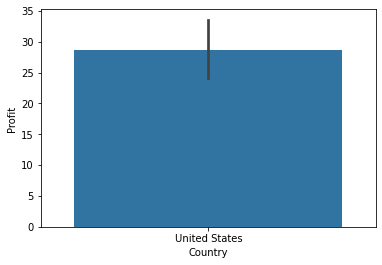

In [ ]:
sns.barplot(x="Country", y="Profit", data=df)

Grouping Multiple Categorial Features and analyzing Heatmaps

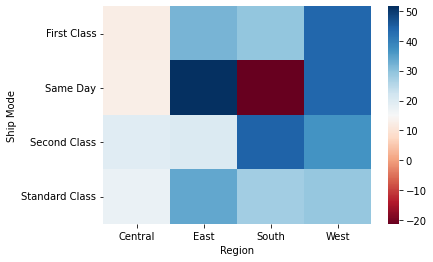

In [ ]:
df_test=df[['Ship Mode','Region','Profit']]
heatmap_data = pd.pivot_table(df_test,values='Profit',index='Ship Mode',columns='Region')
sns.heatmap(heatmap_data,cmap='RdBu')

In [ ]:
cont_table=pd.crosstab(index=df['Ship Mode'], columns=df['Region'])
stats.chi2_contingency(cont_table,correction=True)

(23.846239703707703,
 0.004551137492452852,
 9,
 array([[ 357.49189514,  438.28537122,  249.30558335,  492.91715029],
        [ 126.21462878,  154.73924355,   88.01881129,  174.02731639],
        [ 452.09475685,  554.26856114,  315.2791675 ,  623.35751451],
        [1387.19871923, 1700.70682409,  967.39643786, 1912.69801881]]))

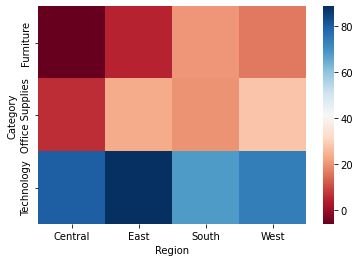

In [ ]:
df_test=df[['Category','Region','Profit']]
heatmap_data = pd.pivot_table(df_test,values='Profit',index='Category',columns='Region')
sns.heatmap(heatmap_data,cmap='RdBu')

In [ ]:
cont_table=pd.crosstab(index=df['Category'], columns=df['Region'])
stats.chi2_contingency(cont_table,correction=True)

(3.6619309383265723,
 0.7223155543986877,
 6,
 array([[ 493.00410246,  604.42345407,  343.80828497,  679.7641585 ],
        [1400.68020812, 1717.23514108,  976.79807885, 1931.28657194],
        [ 429.31568941,  526.34140484,  299.39363618,  591.94926956]]))

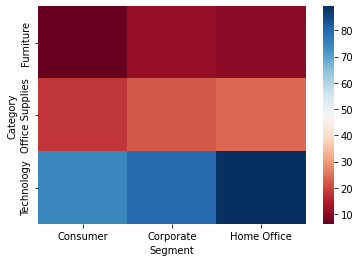

In [ ]:
df_test=df[['Category','Segment','Profit']]
heatmap_data = pd.pivot_table(df_test,values='Profit',index='Category',columns='Segment')
sns.heatmap(heatmap_data,cmap='RdBu')

In [ ]:
cont_table=pd.crosstab(index=df['Category'], columns=df['Segment'])
stats.chi2_contingency(cont_table,correction=True)

(1.4612447366020676,
 0.8334835825190556,
 4,
 array([[1101.67210326,  640.92655593,  378.4013408 ],
        [3129.97458475, 1820.94456674, 1075.08084851],
        [ 959.35331199,  558.12887733,  329.51781069]]))

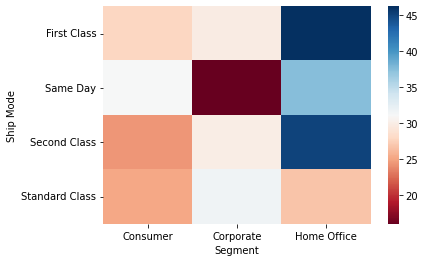

In [ ]:
df_test=df[['Ship Mode','Segment','Profit']]
heatmap_data = pd.pivot_table(df_test,values='Profit',index='Ship Mode',columns='Segment')
sns.heatmap(heatmap_data,cmap='RdBu')

In [ ]:
cont_table=pd.crosstab(index=df['Ship Mode'], columns=df['Segment'])
stats.chi2_contingency(cont_table,correction=True)

(28.097944167868892,
 9.005463273040496e-05,
 6,
 array([[ 798.85511307,  464.75485291,  274.39003402],
        [ 282.04052431,  164.08445067,   96.87502502],
        [1010.25565339,  587.74264559,  347.00170102],
        [3099.84870923, 1803.41805083, 1064.73323994]]))

In [ ]:
cont_table=pd.crosstab(index=df['Ship Mode'], columns=df['Category'])
stats.chi2_contingency(cont_table,correction=True)

(3.5789107440384584,
 0.7334430848247819,
 6,
 array([[ 326.40564339,  927.35521313,  284.23914349],
        [ 115.23944367,  327.40824495,  100.35231139],
        [ 412.7821693 , 1172.76065639,  359.4571743 ],
        [1266.57274365, 3598.47588553, 1102.95137082]]))

In [ ]:
cont_table=pd.crosstab(index=df['Region'], columns=df['Segment'])
stats.chi2_contingency(cont_table,correction=True)

(4.994063939208065,
 0.5445746876991089,
 6,
 array([[1206.59325595,  701.96718031,  414.43956374],
        [1479.28437062,  860.61236742,  508.10326196],
        [ 841.44686812,  489.53372023,  289.01941165],
        [1663.6755053 ,  967.88673204,  571.43776266]]))

Regression Plots

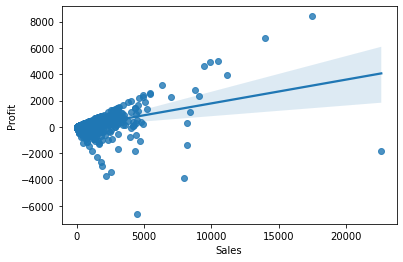

In [ ]:
sns.regplot(x="Sales",y="Profit",data=df)


In [ ]:
pearson_coeff,p_value=stats.pearsonr(df['Sales'],df['Profit'])
print("pearson Coefficient: ", pearson_coeff)
print("P-value: ", p_value)

pearson Coefficient:  0.4790643497377061
P-value:  0.0


In [ ]:
df[['Sales','Profit']].corr()

,Sales,Profit
Sales,1.000000,0.479064
Profit,0.479064,1.000000


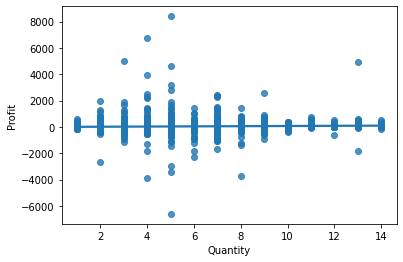

In [ ]:
sns.regplot(x="Quantity",y="Profit",data=df)

In [ ]:
pearson_coeff,p_value=stats.pearsonr(df['Quantity'],df['Profit'])
print("pearson Coefficient: ", pearson_coeff)
print("P-value: ", p_value)

pearson Coefficient:  0.06625318912428485
P-value:  3.361709415923692e-11


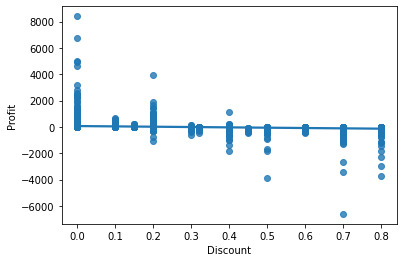

In [ ]:
sns.regplot(x="Discount",y="Profit",data=df)

In [ ]:
pearson_coeff,p_value=stats.pearsonr(df['Discount'],df['Profit'])
print("pearson Coefficient: ", pearson_coeff)
print("P-value: ", p_value)

pearson Coefficient:  -0.21948745637176847
P-value:  2.702294436219114e-109


# Binning

In [ ]:
bins = np.linspace(df['Profit'].min(),df['Profit'].max(),4)
group_names = ["Low","Medium","High"]
df['Binned_Profit'] = pd.cut(df['Profit'], bins, labels=group_names, include_lowest=True)
df['Binned_Profit'].value_counts()

Medium    9977
Low         11
High         6
Name: Binned_Profit, dtype: int64

# Data Normalization

In [ ]:
for col in ['Sales','Quantity','Discount','Profit']:
  df[col] = (df[col] - df[col].min())/(df[col].max() - df[col].min())

df[['Sales','Quantity','Discount','Profit']].head()

,Sales,Quantity,Discount,Profit
0,0.011552,0.076923,0.0000,0.442794
1,0.032313,0.153846,0.0000,0.454639
2,0.000626,0.076923,0.0000,0.440458
3,0.042280,0.307692,0.5625,0.414464
4,0.000968,0.076923,0.2500,0.440168
